In [141]:
import pandas as pd
import numpy as np
import talib
import plotly.graph_objects as go
import datetime
import warnings
warnings.filterwarnings('ignore')

In [142]:
df = pd.read_csv("infy2023.csv")
df['Date'] = df['Date'].astype(str).str[4:21]
df['Date'] = pd.to_datetime(df.Date)
df[['Date','Open', 'High', 'Low', 'Close']].tail(5)

,Date,Open,High,Low,Close
28,2023-01-06,1470.00,1475.00,1446.50,1448.50
29,2023-01-09,1448.20,1489.35,1448.20,1484.45
30,2023-01-10,1482.00,1483.90,1454.05,1469.75
31,2023-01-11,1470.00,1494.00,1464.00,1471.25
32,2023-01-12,1481.95,1485.00,1455.05,1479.00


In [143]:
df = df.iloc[:-1,:]
df2 = df[['Date', 'Open', 'High', 'Low', 'Close']]
df2.tail()
high = round(df2['High'].iloc[-1],2)
low = round(df2['Low'].iloc[-1], 2)
close =  round(df2['Close'].iloc[-1], 2)

Pivot_Point = round((high + low + close) / 3,2)

Resistance_1 = round(2 * Pivot_Point - low, 2)
Support_1 = round(2 * Pivot_Point - high, 2)

Resistance_2 = round(Pivot_Point + high - low, 2)
Support_2 = round(Pivot_Point - (high - low), 2)

Resistance_3 = round(Pivot_Point + 2 * (high - low), 2)
Support_3 = round(Pivot_Point - 2 * (high - low), 2)

print(f"{Pivot_Point=} \n{Resistance_1=} \n{Support_1=} \n{Resistance_2=} \n{Support_2=} \n{Resistance_3=} \n{Support_3=}")



Pivot_Point=1476.42 
Resistance_1=1488.84 
Support_1=1458.84 
Resistance_2=1506.42 
Support_2=1446.42 
Resistance_3=1536.42 
Support_3=1416.42


In [144]:
df3 = pd.read_csv("infy5min.csv")
df3['Date'] = df3['Date'].astype(str).str[4:21]
df3['Date'] = pd.to_datetime(df3.Date)
df3.set_index('Date', inplace=True)
df3.columns = ['Open', 'High', 'Low', 'Close', 'Pivot Point', 'Resistance 1', 'Support 1', 'Resistance 2', 'Support 2', 'Resistance 3','Support 3']
df4 = pd.DataFrame(df3[['Pivot Point', 'Resistance 1', 'Support 1','Resistance 2', 'Support 2', 'Resistance 3','Support 3']].iloc[-1].transpose())
df4

,2023-01-12 14:25:00
Pivot Point,1476.38
Resistance 1,1488.67
Support 1,1458.77
Resistance 2,1506.28
Support 2,1446.48
Resistance 3,1536.18
Support 3,1416.58


<AxesSubplot:xlabel='Date'>

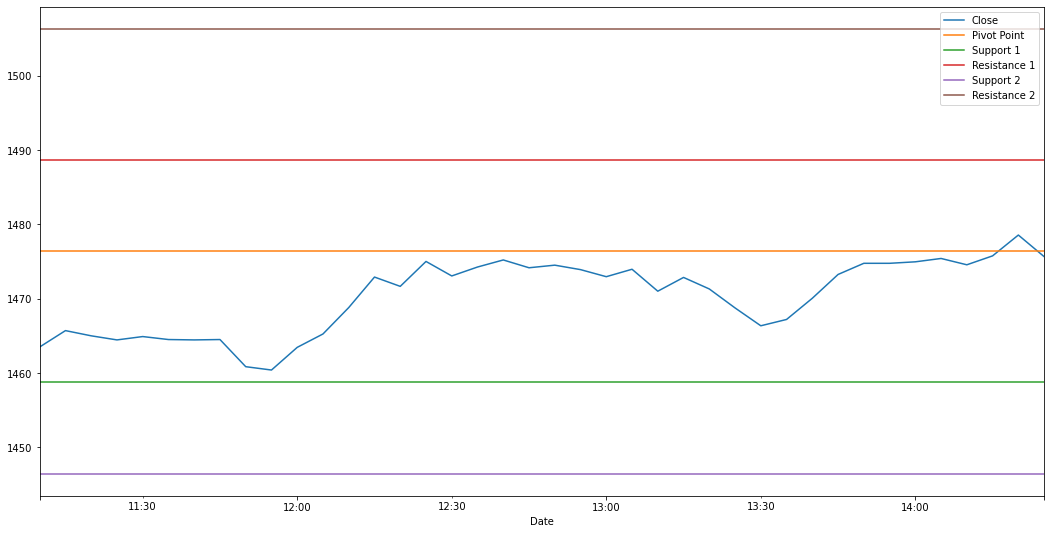

In [145]:
df3[['Close', 'Pivot Point', 'Support 1', 'Resistance 1', 'Support 2', 'Resistance 2']].plot(figsize=(18,9))